In [ ]:
#Installing required packages

In [2]:
! pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [17]:
!pip install GPUtil

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7410 sha256=6f98eb8aef1b77ef49cc1c21ce442e4385543a87045fa0c1b7d7cbe2a251ff86
  Stored in directory: c:\users\kammi\appdata\local\pip\cache\wheels\2b\b5\24\fbb56595c286984f7315ee31821d6121e1b9828436021a88b3
Successfully built GPUtil


In [ ]:
#Importing libraries

In [1]:
import torch
import os
import tensorflow as tf
import shutil
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import glob


use_cuda = torch.cuda.is_available()

In [ ]:
#Verifying cuda

In [2]:
use_cuda

True

In [3]:
if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)

__CUDNN VERSION: 8302
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA GeForce RTX 3070 Ti Laptop GPU
__CUDA Device Total Memory [GB]: 8.589410304


In [ ]:
#Renaming the original data files

In [18]:
# Set the directory path where the images are stored
path = 'C:\\Users\\kammi\\Downloads\\DACON_SEMICONDUCTOR\\dataset\\images'


# This will list all files in the directory
files = os.listdir(path)

# Loop through all files in the directory and rename them
for index, file in enumerate(files):
    # This creates a new file name as 'custom_name_1.jpg', 'custom_name_2.jpg', etc.
    new_file_name = f"semiconductor_{index}.jpg"
    
    # Full path for both old and new file names
    old_file_path = os.path.join(path, file)
    new_file_path = os.path.join(path, new_file_name)
    
    # Renaming the file
    os.rename(old_file_path, new_file_path)

print("Files have been renamed successfully.")


Files have been renamed successfully.


In [ ]:
#Train, Test and Val splitting the dataset

In [19]:
# Set the directory path where your images are stored
image_directory = 'C:\\Users\\kammi\\Downloads\\DACON_SEMICONDUCTOR\\dataset\\images'

# Get a list of image file names
image_files = [file for file in os.listdir(image_directory) if file.endswith(('.jpg'))]

# Optionally, shuffle the file names if you want random splits
np.random.shuffle(image_files)

# Split the dataset into train, validation, and test sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)  

# Define the paths for the train, validation, and test directories
train_dir = 'C:\\Users\\kammi\\Downloads\\DACON_SEMICONDUCTOR\\dataset\\train'
val_dir = 'C:\\Users\\kammi\\Downloads\\DACON_SEMICONDUCTOR\\dataset\\val'
test_dir = 'C:\\Users\\kammi\\Downloads\\DACON_SEMICONDUCTOR\\dataset\\test'

# Function to create a new directory if it doesn't exist
def create_directory(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

# Create the train, validation, and test directories
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

# Function to copy files to a new directory based on the split
def copy_files(file_list, source_dir, destination_dir):
    for file in file_list:
        shutil.copy(os.path.join(source_dir, file), os.path.join(destination_dir, file))

# Copy the files to the respective directories
copy_files(train_files, image_directory, train_dir)
copy_files(val_files, image_directory, val_dir)
copy_files(test_files, image_directory, test_dir)

print("Dataset successfully split into train, validation, and test sets, and directories have been created.")


Dataset successfully split into train, validation, and test sets, and directories have been created.


In [55]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\kammi\\Downloads\\DACON_SEMICONDUCTOR\\dataset\\train',
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        'C:\\Users\\kammi\\Downloads\\DACON_SEMICONDUCTOR\\dataset\\val',
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'C:\\Users\\kammi\\Downloads\\DACON_SEMICONDUCTOR\\dataset\\test',
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 187 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


In [56]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [57]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [58]:
history = model.fit(
      train_generator,
      steps_per_epoch=18,  # Number of images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=6,  # Number of images = batch_size * steps
      verbose=2)

Epoch 1/100
18/18 - 4s - loss: 0.6362 - accuracy: 0.8814 - val_loss: 0.1944 - val_accuracy: 0.9667 - 4s/epoch - 248ms/step
Epoch 2/100
18/18 - 3s - loss: 0.3633 - accuracy: 0.8814 - val_loss: 0.1437 - val_accuracy: 0.9667 - 3s/epoch - 168ms/step
Epoch 3/100
18/18 - 3s - loss: 0.3423 - accuracy: 0.8814 - val_loss: 0.1812 - val_accuracy: 0.9667 - 3s/epoch - 179ms/step
Epoch 4/100
18/18 - 3s - loss: 0.3232 - accuracy: 0.8927 - val_loss: 0.1460 - val_accuracy: 0.9667 - 3s/epoch - 165ms/step
Epoch 5/100
18/18 - 3s - loss: 0.3042 - accuracy: 0.8814 - val_loss: 0.1737 - val_accuracy: 0.9667 - 3s/epoch - 176ms/step
Epoch 6/100
18/18 - 3s - loss: 0.2342 - accuracy: 0.9111 - val_loss: 0.1563 - val_accuracy: 0.9500 - 3s/epoch - 166ms/step
Epoch 7/100
18/18 - 3s - loss: 0.2164 - accuracy: 0.9153 - val_loss: 0.1581 - val_accuracy: 0.9333 - 3s/epoch - 186ms/step
Epoch 8/100
18/18 - 3s - loss: 0.1816 - accuracy: 0.9266 - val_loss: 0.1046 - val_accuracy: 0.9667 - 3s/epoch - 178ms/step
Epoch 9/100
18/1

In [59]:
eval_result = model.evaluate(test_generator)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

7/7 [==============================] - 0s 61ms/step - loss: 1.4970 - accuracy: 0.8730
Test Loss: 1.4969782829284668, Test Accuracy: 0.8730158805847168


1/1 [==============================] - 0s 28ms/step


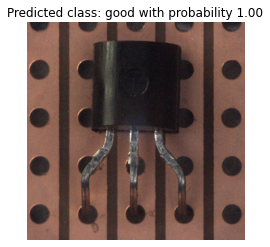

1/1 [==============================] - 0s 33ms/step


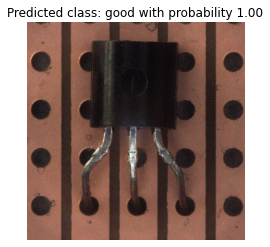

1/1 [==============================] - 0s 24ms/step


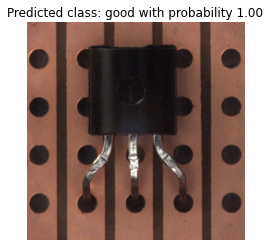

1/1 [==============================] - 0s 23ms/step


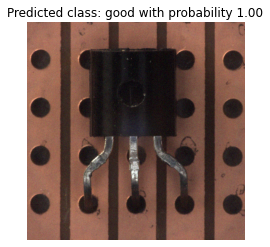

1/1 [==============================] - 0s 21ms/step


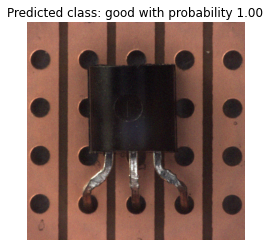

1/1 [==============================] - 0s 22ms/step


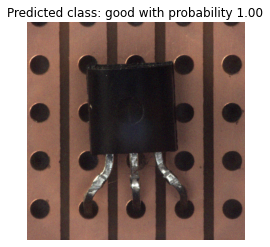

1/1 [==============================] - 0s 20ms/step


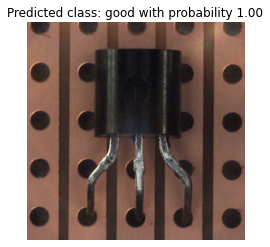

1/1 [==============================] - 0s 24ms/step


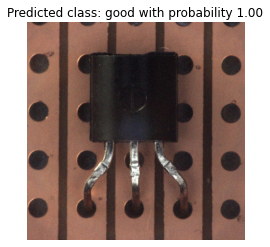

1/1 [==============================] - 0s 41ms/step


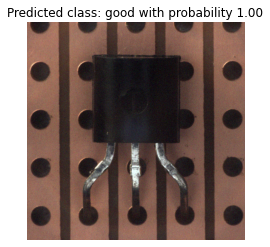

1/1 [==============================] - 0s 25ms/step


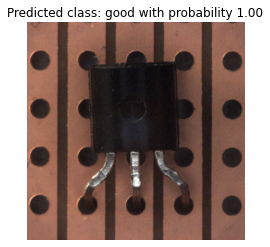

1/1 [==============================] - 0s 24ms/step


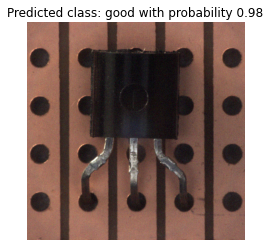

1/1 [==============================] - 0s 31ms/step


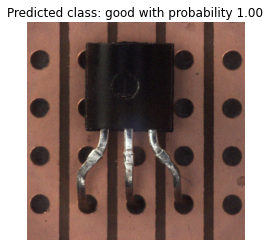

1/1 [==============================] - 0s 21ms/step


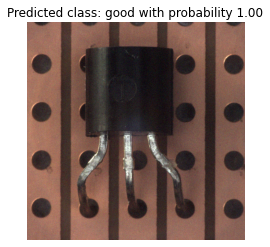

1/1 [==============================] - 0s 27ms/step


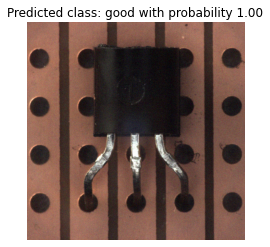

1/1 [==============================] - 0s 31ms/step


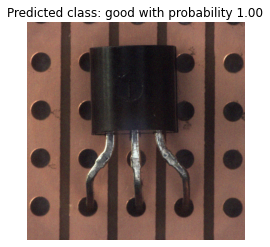

1/1 [==============================] - 0s 20ms/step


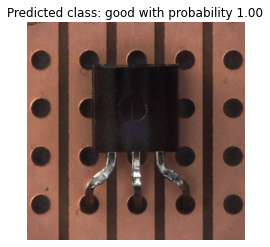

1/1 [==============================] - 0s 28ms/step


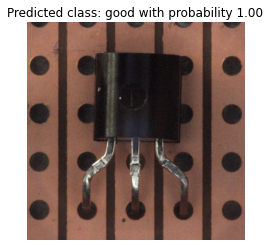

1/1 [==============================] - 0s 23ms/step


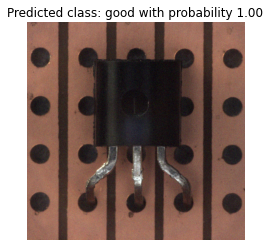

1/1 [==============================] - 0s 27ms/step


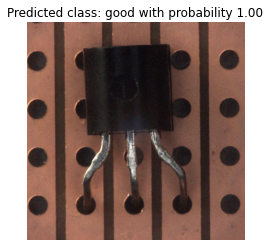

1/1 [==============================] - 0s 24ms/step


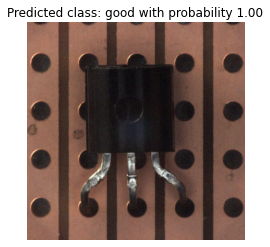

1/1 [==============================] - 0s 30ms/step


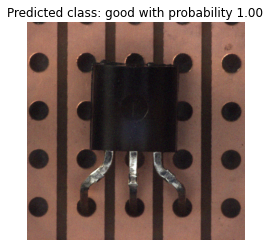

1/1 [==============================] - 0s 26ms/step


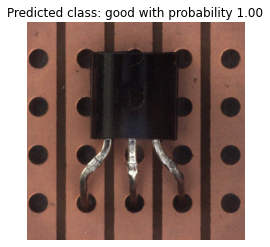

1/1 [==============================] - 0s 27ms/step


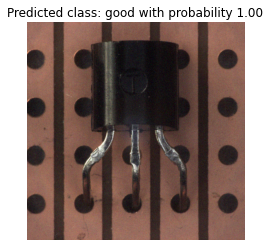

1/1 [==============================] - 0s 24ms/step


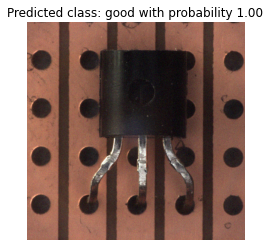

1/1 [==============================] - 0s 26ms/step


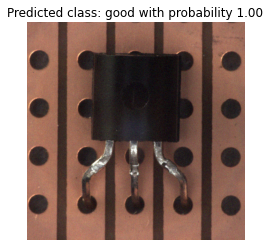

1/1 [==============================] - 0s 30ms/step


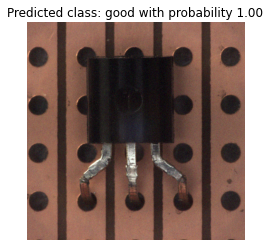

1/1 [==============================] - 0s 33ms/step


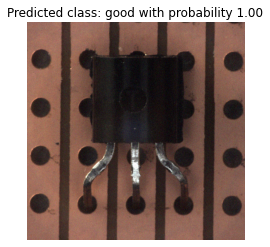

1/1 [==============================] - 0s 26ms/step


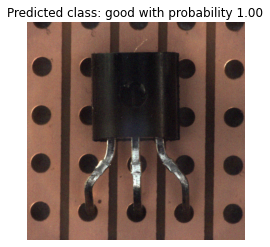

1/1 [==============================] - 0s 25ms/step


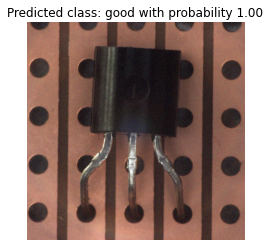

1/1 [==============================] - 0s 31ms/step


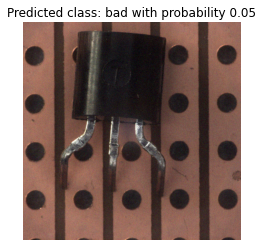

1/1 [==============================] - 0s 35ms/step


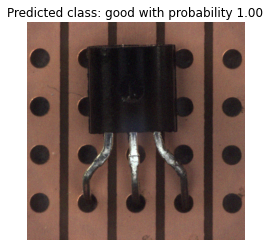

1/1 [==============================] - 0s 27ms/step


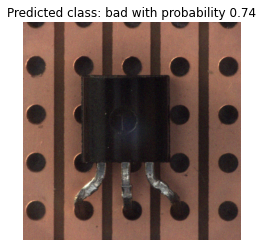

1/1 [==============================] - 0s 30ms/step


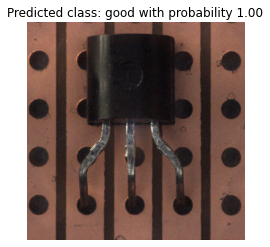

1/1 [==============================] - 0s 29ms/step


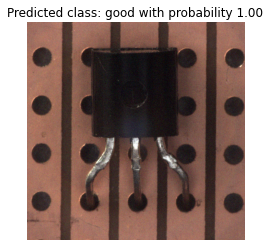

1/1 [==============================] - 0s 29ms/step


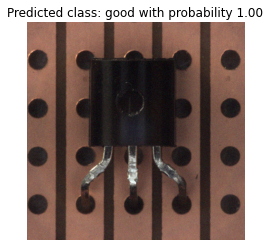

1/1 [==============================] - 0s 22ms/step


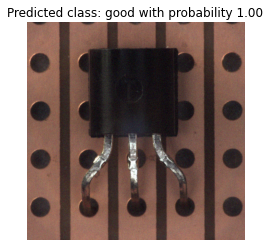

1/1 [==============================] - 0s 30ms/step


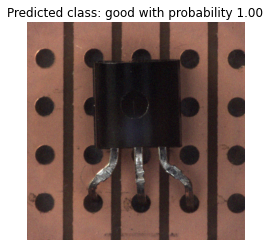

1/1 [==============================] - 0s 30ms/step


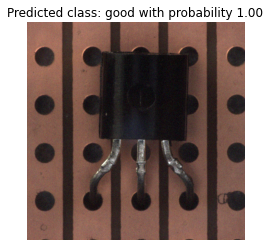

1/1 [==============================] - 0s 20ms/step


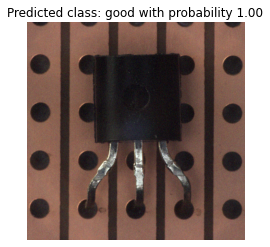

1/1 [==============================] - 0s 22ms/step


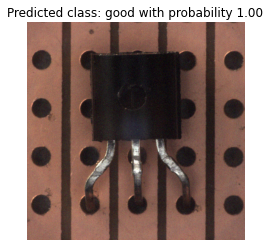

1/1 [==============================] - 0s 26ms/step


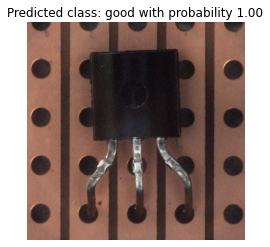

1/1 [==============================] - 0s 21ms/step


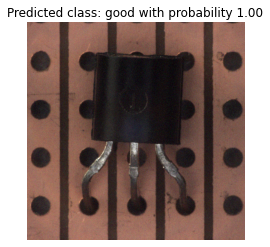

1/1 [==============================] - 0s 36ms/step


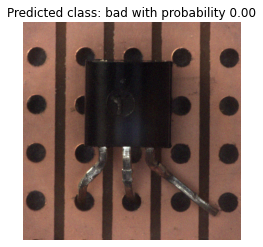

1/1 [==============================] - 0s 21ms/step


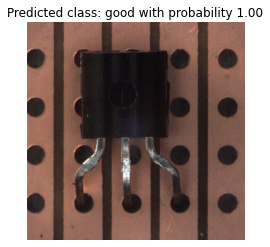

1/1 [==============================] - 0s 27ms/step


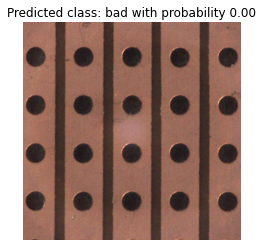

1/1 [==============================] - 0s 34ms/step


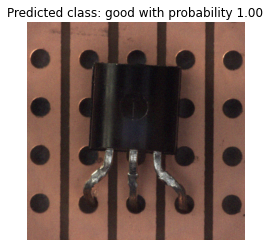

1/1 [==============================] - 0s 40ms/step


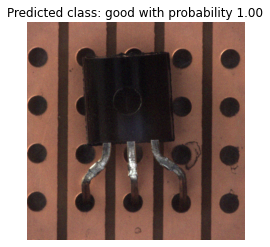

1/1 [==============================] - 0s 27ms/step


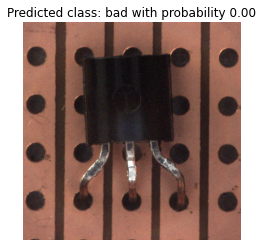

1/1 [==============================] - 0s 31ms/step


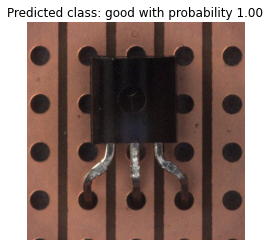

1/1 [==============================] - 0s 24ms/step


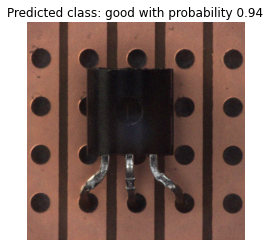

1/1 [==============================] - 0s 31ms/step


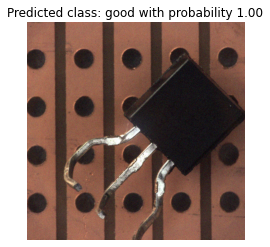

1/1 [==============================] - 0s 34ms/step


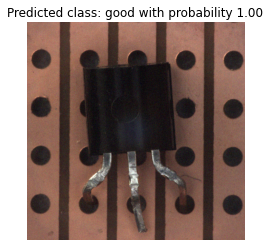

1/1 [==============================] - 0s 31ms/step


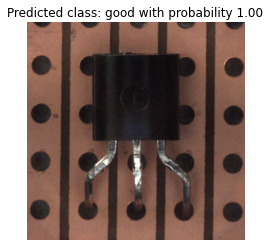

1/1 [==============================] - 0s 20ms/step


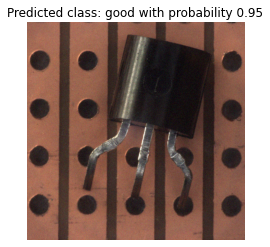

1/1 [==============================] - 0s 28ms/step


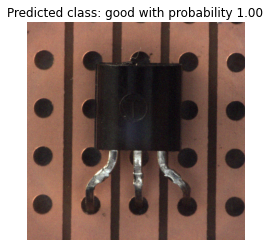

1/1 [==============================] - 0s 30ms/step


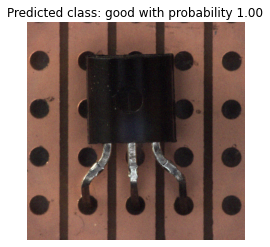

1/1 [==============================] - 0s 23ms/step


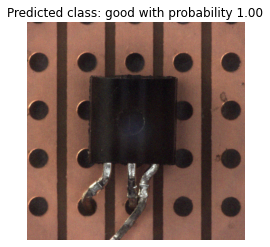

1/1 [==============================] - 0s 26ms/step


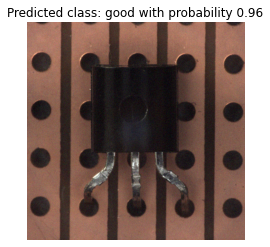

1/1 [==============================] - 0s 26ms/step


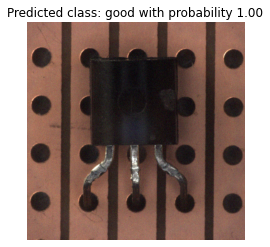

1/1 [==============================] - 0s 27ms/step


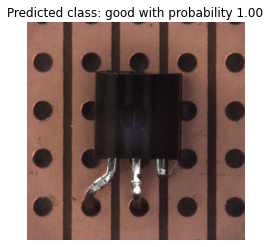

1/1 [==============================] - 0s 28ms/step


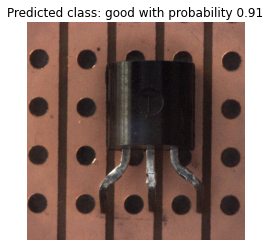

1/1 [==============================] - 0s 30ms/step


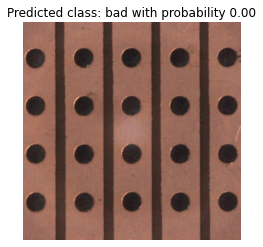

1/1 [==============================] - 0s 29ms/step


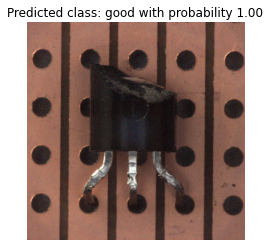

In [62]:
# Directory containing test images
test_dir = 'C:\\Users\\kammi\\Downloads\\DACON_SEMICONDUCTOR\\dataset\\test'

# Assuming you have two classes: 'good' and 'bad'
class_names = {0: 'good', 1: 'bad'}

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)  # Convert the image to a numpy array
    img_tensor = np.expand_dims(img_tensor, axis=0)  # Add a dimension for the batch
    img_tensor /= 255.  # Scale the image values to [0, 1]
    return img_tensor

# Function to display image and prediction
def display_image_and_prediction(img_path):
    img_tensor = load_and_preprocess_image(img_path)
    
    # Get the model's prediction
    prediction = model.predict(img_tensor)
    
    # Determine the predicted class based on the probability
    predicted_class = class_names[np.argmax(prediction)]
    probability = np.max(prediction)
    
    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.axis('off')  # No axis for the image
    
    # Display the prediction
    if probability > 0.75:
        plt.title(f'Predicted class: good with probability {probability:.2f}')
    else:
        plt.title(f'Predicted class: bad with probability {probability:.2f}')
    plt.show()

# Iterate over test images and display them with predictions
jpg_files = glob.glob(os.path.join(test_dir, '*.jpg'))
for img_file in jpg_files:
    display_image_and_prediction(img_file)
